In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('df1.xlsx', sheet_name='Sheet1')
print(df.tail(10))

     Index     peso  comprimento_Total  comprimento_Padrao  \
463    NaN  1013.74               36.0                30.3   
464    NaN   795.64               34.5                28.3   
465    NaN   911.28               35.5                29.8   
466    NaN   898.40               36.0                30.2   
467    NaN   810.48               34.5                28.6   
468    NaN   822.67               36.0                30.6   
469    NaN   653.60               32.0                26.7   
470    NaN   905.54               35.2                28.8   
471    NaN   754.89               33.3                29.4   
472    NaN   756.22               33.3                28.2   

     comprimento_Cabeça  altura  espessura  Cluster  cluster  
463                 9.8    11.6        3.5        1        1  
464                 9.2    10.8        3.2        1        1  
465                 8.2    10.8        3.1        1        1  
466                 9.5    10.7        3.0        1        1  
46

In [3]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [4]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,4889
1,Target,peso
2,Target type,Regression
3,Original data shape,"(473, 9)"
4,Transformed data shape,"(473, 8)"
5,Transformed train set shape,"(378, 8)"
6,Transformed test set shape,"(95, 8)"
7,Numeric features,8
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,33.2351,2387.1832,48.1029,0.9460,0.0935,0.0667,0.0690
rf,Random Forest Regressor,34.0743,2503.5398,49.2754,0.9425,0.0965,0.0690,0.0810
gbr,Gradient Boosting Regressor,34.6041,2561.5547,49.8707,0.9417,0.0960,0.0694,0.0310
lightgbm,Light Gradient Boosting Machine,35.4274,2683.7684,50.8195,0.9396,0.0974,0.0715,0.0870
huber,Huber Regressor,35.7327,2691.3479,50.8025,0.9391,0.1077,0.0746,0.0180
ridge,Ridge Regression,36.4742,2684.7414,50.7405,0.9388,0.1108,0.0779,0.0120
br,Bayesian Ridge,36.5000,2681.5561,50.7124,0.9388,0.1103,0.0779,0.0150
lr,Linear Regression,36.4725,2691.6936,50.8071,0.9387,0.1114,0.0779,0.7900
lar,Least Angle Regression,36.4725,2691.6936,50.8071,0.9387,0.1114,0.0779,0.0130
lasso,Lasso Regression,36.7205,2683.4591,50.7103,0.9386,0.1087,0.0785,0.0140


In [5]:
rf = exp2.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.6006,2675.4193,51.7245,0.9580,0.1083,0.0693
1,28.5298,1720.7073,41.4814,0.9281,0.0731,0.0568
2,31.3058,1864.0736,43.1749,0.9593,0.0740,0.0579
3,39.6286,5036.4059,70.9676,0.8950,0.1472,0.0864
4,31.8910,2140.9266,46.2701,0.9405,0.0976,0.0657
5,29.7745,1550.9167,39.3817,0.9659,0.0725,0.0571
6,31.3396,1764.3396,42.0040,0.9601,0.0692,0.0572
7,36.6835,2164.9007,46.5285,0.9485,0.1018,0.0805
8,35.5301,2625.2677,51.2374,0.9490,0.1006,0.0712


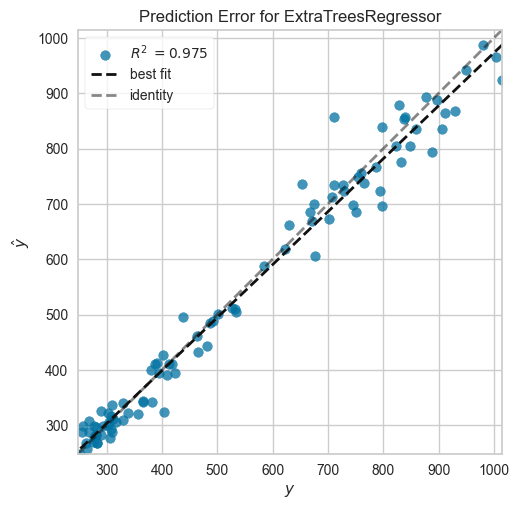

In [6]:
exp2.plot_model(rf, plot = 'error')

In [7]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,26.5921,1398.3225,37.3942,0.9748,0.0671,0.0511


,Index,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura,Cluster,cluster,peso,prediction_label
254,NaN,28.400000,24.600000,7.8,8.8,3.2,1,1,501.260010,501.260010
383,NaN,33.000000,27.400000,9.5,10.4,3.4,1,1,786.659973,766.487293
427,NaN,33.200001,27.600000,9.2,10.4,3.1,1,1,759.400024,755.831992
297,NaN,28.799999,24.600000,7.9,8.9,2.9,1,1,534.599976,504.502902
422,NaN,34.000000,28.299999,9.3,11.1,3.4,1,1,798.020020,839.548690
96,NaN,22.900000,19.299999,5.5,7.0,3.1,1,1,275.720001,268.868493
79,NaN,24.500000,20.400000,6.4,7.2,3.2,1,1,329.119995,309.664899
428,NaN,37.200001,30.100000,9.5,11.4,3.0,1,1,949.419983,941.527100
316,NaN,34.000000,29.200001,9.8,11.4,3.2,1,1,828.729980,879.297902
382,NaN,33.000000,27.400000,8.7,10.4,3.3,1,1,711.080017,734.057588


In [9]:
peso_pred_semEspe.head()

,Index,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura,Cluster,cluster,peso,prediction_label
386,NaN,32.700001,26.900000,9.4,10.3,3.6,1,1,764.080017,738.375298
445,NaN,35.099998,29.700001,9.5,11.4,3.3,1,1,896.719971,887.763106
337,NaN,33.099998,28.400000,9.1,11.2,3.5,1,1,838.239990,856.923196
463,NaN,36.000000,30.299999,9.8,11.6,3.5,1,1,1013.739990,923.730013
55,NaN,25.400000,21.299999,6.2,8.3,3.2,1,1,408.440002,391.489409


# Salvando do Modelo

In [10]:
### Saving model 
#save_model(rf, 'gbr_df1') 


In [11]:
################### LOADING MODEL
#saved_rf = load_model('gbr_df1') 

#saved_rf 

In [12]:
#exp2.predict_model(saved_rf)

In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)